# Importamos librerías y cargamos la base de datos para comenzar a analizar

In [1]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt
#import seaborn as sns

In [2]:
data = pd.read_csv('properatti.csv')

In [3]:
data.head(3)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...


 Vemos cuantas Filas y Columnas tiene

In [4]:
print("cantidad de filas: " + str(data.shape[0]))
print("cantidad de columnas: " + str(data.shape[1]))

cantidad de filas: 121220
cantidad de columnas: 26


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  121220 non-null  int64  
 1   operation                   121220 non-null  object 
 2   property_type               121220 non-null  object 
 3   place_name                  121197 non-null  object 
 4   place_with_parent_names     121220 non-null  object 
 5   country_name                121220 non-null  object 
 6   state_name                  121220 non-null  object 
 7   geonames_id                 102503 non-null  float64
 8   lat-lon                     69670 non-null   object 
 9   lat                         69670 non-null   float64
 10  lon                         69670 non-null   float64
 11  price                       100810 non-null  float64
 12  currency                    100809 non-null  object 
 13  price_aprox_lo

In [6]:
data.describe()

,Unnamed: 0,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
count,121220.000000,1.025030e+05,69670.000000,69670.000000,1.008100e+05,1.008100e+05,1.008100e+05,81892.000000,101313.000000,68617.000000,8.765800e+04,7899.000000,47390.000000,1.426200e+04
mean,60609.500000,3.574442e+06,-34.626210,-59.266290,4.685259e+05,4.229397e+06,2.397006e+05,233.795328,133.050181,2160.086916,6.912216e+03,17.452336,3.080840,5.009234e+03
std,34993.344153,3.541306e+05,1.980936,2.299922,2.260101e+06,6.904714e+06,3.913239e+05,1782.222147,724.351479,2759.288621,2.837864e+04,120.243621,1.860773,1.204403e+05
min,0.000000,3.427208e+06,-54.823985,-75.678931,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.600000,1.510204e+00,1.000000,1.000000,1.000000e+00
25%,30304.750000,3.430234e+06,-34.669065,-58.727040,1.100000e+05,1.583309e+06,8.973388e+04,50.000000,45.000000,1218.181818,1.550000e+03,1.000000,2.000000,1.000000e+03
50%,60609.500000,3.433910e+06,-34.597985,-58.480128,1.850000e+05,2.558452e+06,1.450000e+05,84.000000,75.000000,1800.000000,2.213115e+03,3.000000,3.000000,2.000000e+03
75%,90914.250000,3.836668e+06,-34.441299,-58.395908,4.200000e+05,4.675792e+06,2.650000e+05,200.000000,150.000000,2486.411765,3.355549e+03,6.000000,4.000000,4.000000e+03
max,121219.000000,6.948895e+06,4.545843,-53.733330,6.500000e+08,8.212711e+08,4.654544e+07,200000.000000,187000.000000,206333.333333,4.000000e+06,3150.000000,32.000000,1.000150e+07


Eliminamos columnas que sabemos que no vamos a utilizar.

In [7]:
data.drop(["image_thumbnail", "properati_url", "expenses", "floor"], axis=1, inplace = True)

### Obtenemos los porcentajes de datos faltantes de cada columna

In [8]:
def freq_na(df, zeros=False):
    miss      = df.isnull().sum(axis=0)
    miss_prop = miss / len(df)
    freq = pd.concat([miss, miss_prop], axis=1)
    freq.columns = ['total', 'proporcion']
    return freq if zeros else freq[freq['total'] > 0].sort_values(by='proporcion',ascending=False)

freq_na(data)

,total,proporcion
rooms,73830,0.609058
price_usd_per_m2,52603,0.433947
lat-lon,51550,0.425260
lat,51550,0.425260
lon,51550,0.425260
surface_total_in_m2,39328,0.324435
price_per_m2,33562,0.276869
currency,20411,0.168380
price,20410,0.168372
price_aprox_local_currency,20410,0.168372


In [9]:
def mostrar_nulos(df):
    
    nulos = df.isnull().sum() / len(df)
    nulos = nulos[nulos > 0]
    nulos.sort_values(inplace=True)
    
    nulos = nulos.to_frame()
    nulos.columns = ['total']
    nulos.index.names = ['variable']
    nulos['variable'] = nulos.index
    # ploteo
    sns.set(style="whitegrid", color_codes=True)
    sns.barplot(x='variable', y='total', data=nulos)
    plt.xticks(rotation = 90)
    plt.show()
mostrar_nulos(data)

NameError: name 'sns' is not defined

CONCLUSIÓN DE LA OBSERVACIÓN INICIAL:

El DataSet posee algunas columnas con muchos valores faltantes, posibles duplicados o posibles datos no confiables.

Las columnas o datos centrales del análisis que realizaremos son aquellos que nos indiquen:

a) ubicación de las observaciones

b) precio x M2

c) las variables de las cuales dependan las mismas (como ser tipo de propiedad, amenities, garage).

Por lo antes dicho, en este momento sólo nos limitaremos a realizar un drop de las observaciones duplicadas que puedan existir.

##### Evaluando data para ver si hay datos duplicados incluyendo la mayor cantidad de columnas que logicamente deban coincidir.

In [10]:
data_duplicates_mask = data.duplicated(subset=["place_name", "country_name", "description", "title", "lat-lon", "state_name", "price_aprox_usd"], keep="first")
print("registros duplicados en data: ", any(data_duplicates_mask))
print("cantidad de registros duplicados en data: ", data_duplicates_mask.sum())

registros duplicados en data:  True
cantidad de registros duplicados en data:  6496


In [11]:
data= data.drop_duplicates(subset=["place_name", "country_name", "description", "title", "lat-lon", "state_name", "price_aprox_usd"], keep="first")
data.shape

(114724, 22)

### ANÁLISIS DE COLUMNAS DE 0 A 9 - UBICACION DE LAS OBSERVACIONES

##### Columna operation

In [12]:
# Como vemos posee la totalidad de valores sell y sin vacíos, por lo que no agregaría valor. Atacaremos el Drop de columnas más adelante.
operation_group = data.groupby('operation').country_name.count()
operation_group

operation
sell    114724
Name: country_name, dtype: int64

##### Columna property type

In [13]:
# Como vemos posee la totalidad de valores completos y nos será de mucha importancia para analizar los valores por tipo de propiedad.
property_type_group = data.groupby('property_type').property_type.count()
property_type_group

property_type
PH            5532
apartment    65439
house        39705
store         4048
Name: property_type, dtype: int64

Todos los valores estan son "PH", "apartment", "house" y "store". Sin valores nulos.

In [14]:
ciudades = data.groupby('place_name').place_name.count()
ciudades_ordenadas = ciudades.sort_values(ascending=False)
ciudades_ordenadas.head(10)

place_name
Córdoba          8544
Rosario          7142
Mar del Plata    6486
Tigre            3182
Nordelta         3036
Belgrano         2753
Palermo          2669
La Plata         2419
Pilar            2199
Caballito        2160
Name: place_name, dtype: int64

##### Columna place_name

In [15]:
data.place_name.isnull().sum()

23

Contiene 23 valores nulos.

In [16]:
place_name_nulos = data.loc[data.place_name.isnull(), :]
place_name_nulos

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,description,title
6489,6489,sell,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4008968545,-58.63809847",-34.400897,...,USD,11468925.0,650000.0,240.0,240.0,2708.333333,2708.333333,NaN,"Espectacular casa moderna de una planta, con a...",Venta de casa en Santa María de Tigre
10201,10201,sell,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.400704,-58.638067",-34.400704,...,USD,9439807.5,535000.0,NaN,300.0,NaN,1783.333333,5.0,Corredor Responsable: SABRINA COCCONI - CSI 62...,VENTA CASA SANTA MARÍA DE TIGRE COUNTRY BARRIO...
11451,11451,sell,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4026880384,-58.6262613379",-34.402688,...,USD,9704475.0,550000.0,2170.0,270.0,253.456221,2037.037037,NaN,MUY LINDA CASA EN EXCELENTE UBICACION!! Superf...,SANTA MARIA DE TIGRE IMPECABLE
14839,14839,sell,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4007994779,-58.6381735719",-34.400799,...,USD,8469360.0,480000.0,240.0,200.0,2000.000000,2400.000000,NaN,Muy linda casa de estilo clásico.-Planta baja;...,Venta de casa en Santa María de Tigre
18622,18622,sell,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4032781195,-58.6263503945",-34.403278,...,USD,22884916.5,1297000.0,340.0,340.0,3814.705882,3814.705882,NaN,Casa con increible vista al lago con playa de...,Casa con increible vista al lago con playa y m...
21922,21922,sell,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.399704,-58.638405",-34.399704,...,USD,7763580.0,440000.0,NaN,220.0,NaN,2000.000000,5.0,Corredor Responsable: Matias Castelli - CUCICB...,Venta Casa - Barrio Santa Maria de Tigre
23664,23664,sell,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4005161998,-58.6417999185",-34.400516,...,USD,8469360.0,480000.0,294.0,294.0,1632.653061,1632.653061,NaN,EXCELENTE CASA CLASICA con grandes ventanas y ...,CASA EN VENTA EN SANTA MARIA DE TIGRE CON RENTA
24722,24722,sell,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4007292,-58.6377783",-34.400729,...,USD,9351585.0,530000.0,316.0,270.0,1677.215190,1962.962963,NaN,"EN EXCLUSIVIDAD!!!!!!Lindísima casa, muy lumin...",Venta de casa en Santa María de Tigre
38856,38856,sell,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.425087,-58.5796585",-34.425087,...,USD,23820075.0,1350000.0,NaN,550.0,NaN,2454.545455,NaN,SANTA MARIA DE TIGRE- AL RIO - ESPECTACULAR CA...,"Casa (barrio cerrado), Venta"
45970,45970,sell,apartment,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.396074,-58.63738",-34.396074,...,USD,1676227.5,95000.0,55.0,27.0,1727.272727,3518.518519,1.0,"EDIFICIO ZERENA – EL PALMAR, NORDELTA. Torre 2...",Excelente monoambiente. Barrio El Palmar. Con...


Todos los valores nulos son de Tigre.

In [17]:
data.place_name.fillna('Tigre', inplace = True)

C:\Users\Administrador\anaconda3\envs\dhdsblend2021_geopandas\lib\site-packages\pandas\core\series.py:4466: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [18]:
data.place_name.isnull().sum()

0

In [19]:
data.place_name[6489]

'Tigre'

Reemplazo de todos los valores nulos por "Tigre", ya que en place_with_parent_names contiene en todos 'Tigre' 

##### Columna country_name

In [20]:
# Como vemos posee la totalidad de valores Argentina, por lo que no agregaría valor. Atacaremos el Drop de columnas más adelante.
country_name_group = data.groupby('country_name').country_name.count()
country_name_group

country_name
Argentina    114724
Name: country_name, dtype: int64

Todos los valores son "Argentina" y no hay vacios.

##### Columna state_name

In [21]:
state_name_group = data.groupby('state_name').state_name.count()
state_name_group

state_name
Bs.As. G.B.A. Zona Norte        24680
Bs.As. G.B.A. Zona Oeste         9001
Bs.As. G.B.A. Zona Sur          13505
Buenos Aires Costa Atlántica     9908
Buenos Aires Interior            2248
Capital Federal                 30207
Catamarca                          27
Chaco                              57
Chubut                            259
Corrientes                        572
Córdoba                         11304
Entre Ríos                        352
Formosa                            26
Jujuy                              26
La Pampa                          153
La Rioja                            4
Mendoza                           646
Misiones                          401
Neuquén                           569
Río Negro                         789
Salta                             276
San Juan                           40
San Luis                          245
Santa Cruz                         20
Santa Fe                         8783
Santiago Del Estero                 4
T

Ningun valor nulo. Algunas provincias poseen pocas observaciones, cosa que analizaremos más adelante

##### Columna place_with_parent_names

In [22]:
# Analizamos esta columna que como vemos abajo tiene separado por una barra vertical cada ubicación de más general a menos general.
# Parte del país, luego va a la provincia, luego la localidad y el barrio en algunos casos.

place_with_parent_names_group = data.groupby('place_with_parent_names').place_with_parent_names.count()
place_with_parent_names_group.index

Index(['|Argentina|Bs.As. G.B.A. Zona Norte|',
       '|Argentina|Bs.As. G.B.A. Zona Norte|Escobar|',
       '|Argentina|Bs.As. G.B.A. Zona Norte|Escobar| Country Maschwitz Club|',
       '|Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Acacias Blancas|',
       '|Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Altos de Matheu|',
       '|Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Barrio Acacias|',
       '|Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Barrio Alamo Alto|',
       '|Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Barrio Araucarias|',
       '|Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Barrio Ceibos|',
       '|Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Barrio Cerrado "El Aromo"|',
       ...
       '|Argentina|Tucumán|', '|Argentina|Tucumán|Banda del Río Salí|',
       '|Argentina|Tucumán|Concepción|', '|Argentina|Tucumán|Las Talitas|',
       '|Argentina|Tucumán|Lules|',
       '|Argentina|Tucumán|San Miguel de Tucumán|',
       '|Argentina|Tucumán|Tafí Viejo|', '|Argentina|Tucumán|Taf

In [23]:
print("Contiene", len(place_with_parent_names_group.index),"valores distintos")

Contiene 1164 valores distintos


In [24]:
#Separamos la columna por la barra verical para poder aperturarlo.

placestr=data.place_with_parent_names.str
placeseparado = placestr.split('|', expand=True)
placeseparado

,0,1,2,3,4,5,6
0,,Argentina,Capital Federal,Mataderos,,None,None
1,,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,,None,None
2,,Argentina,Capital Federal,Mataderos,,None,None
3,,Argentina,Capital Federal,Liniers,,None,None
4,,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,Centro,,None
...,...,...,...,...,...,...,...
121215,,Argentina,Capital Federal,Belgrano,,None,None
121216,,Argentina,Bs.As. G.B.A. Zona Norte,San Isidro,Beccar,,None
121217,,Argentina,Capital Federal,Villa Urquiza,,None,None
121218,,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,Plaza Colón,,None


In [25]:
# Renombramos las columnas del nuevo DF para luego comparar. Tener en cuenta que place_name tiene la mínima expresión de la ubicación.

placeseparado.rename(columns={1:'country_name_nuevo', 2:'state_name_nuevo', 3:'place_name_nuevo1', 4:'place_name_nuevo2'},inplace=True)

In [26]:
placeseparado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114724 entries, 0 to 121219
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   0                   114724 non-null  object
 1   country_name_nuevo  114724 non-null  object
 2   state_name_nuevo    114724 non-null  object
 3   place_name_nuevo1   114724 non-null  object
 4   place_name_nuevo2   110438 non-null  object
 5   5                   38987 non-null   object
 6   6                   527 non-null     object
dtypes: object(7)
memory usage: 11.0+ MB


In [27]:
#comparamos si coinciden el país que extrajimos de la columna con country_name. Está ok
controlpaises = data['country_name'] == placeseparado['country_name_nuevo']
controlpaises.value_counts()

True    114724
dtype: int64

In [28]:
#comparamos ahora si coincide la provincia y está ok.
controlprovincias = data['state_name'] == placeseparado['state_name_nuevo']
controlprovincias.value_counts()

True    114724
dtype: int64

In [29]:
# tratamos de analizar ahora place_name.
# vemos que la columna 6 del nuevo DF son vacios asique la podemos eliminar
placeseparado[6][placeseparado[6].notnull()].value_counts()

    527
Name: 6, dtype: int64

In [30]:
# vemos que la columna 5 del nuevo DF la mayoría son vacíos y algunos son Barrios.
a = placeseparado[5][placeseparado[5].notnull()].value_counts()
print(a)

# transformamos en NaN los vacíos
placeseparado[5] = placeseparado[5].apply(lambda x: np.NaN if x=='' else x)
a = placeseparado[5][placeseparado[5].notnull()].value_counts()
print(a)

                             38460
Barrio Los Alisos              262
Barrio La Alameda               62
BarrioPortezuelo                52
Barrio Los Lagos                39
Barrio El Golf                  31
Enyoi                           16
Barrio Los Castores             13
QBay Yacht                      13
Barrio Las Glorietas            10
Barrio La Isla                  10
Islas del Canal                  6
Barrio Barrancas del Lago        4
Barrio Los Sauces                4
Barrio Cabos del Lago            3
Barrio El Yacht                  1
Barrio Los Tilos                 1
Name: 5, dtype: int64
Barrio Los Alisos            262
Barrio La Alameda             62
BarrioPortezuelo              52
Barrio Los Lagos              39
Barrio El Golf                31
Enyoi                         16
QBay Yacht                    13
Barrio Los Castores           13
Barrio Las Glorietas          10
Barrio La Isla                10
Islas del Canal                6
Barrio Barrancas del

In [31]:
data.place_name.value_counts()

Córdoba                       8544
Rosario                       7142
Mar del Plata                 6486
Tigre                         3205
Nordelta                      3036
                              ... 
Sierras Bayas                    1
Malabrigo                        1
Helvecia                         1
General Pinto                    1
La Esperanza Club de Campo       1
Name: place_name, Length: 1060, dtype: int64

In [32]:
# De esta columna 5 del nuevo DF se puede ver que son barrios cerrados y coinciden con el data frame original.
b = data.place_name[placeseparado[5].notnull()]
print(b)

c = placeseparado[5][placeseparado[5].notnull()] == b
print(c.value_counts())

# Acá vemos que la totalidad de esos Barrios corresponden a Nordelta, por lo que los sacamos del Data Frame original
# y reemplazamos todos esos valores por Nordelta para poder analizarlos mejor
d = placeseparado['place_name_nuevo2'][placeseparado[5].notnull()]
print(d.value_counts())

data.place_name[placeseparado[5].notnull()] == d
data.place_name.value_counts()

17                   Barrio El Golf
33                   Barrio El Golf
278            Barrio Las Glorietas
416                Barrio Los Lagos
446            Barrio Las Glorietas
                    ...            
117011                   QBay Yacht
118210             Barrio Los Lagos
118841    Barrio Barrancas del Lago
119583    Barrio Barrancas del Lago
120156    Barrio Barrancas del Lago
Name: place_name, Length: 527, dtype: object
True    527
dtype: int64
Nordelta    527
Name: place_name_nuevo2, dtype: int64


Córdoba                       8544
Rosario                       7142
Mar del Plata                 6486
Tigre                         3205
Nordelta                      3036
                              ... 
Sierras Bayas                    1
Malabrigo                        1
Helvecia                         1
General Pinto                    1
La Esperanza Club de Campo       1
Name: place_name, Length: 1060, dtype: int64

In [33]:
# vemos que la columna 4 que llamamos place_name_nuevo2 del nuevo DF la mayoría son vacíos.
a = placeseparado.place_name_nuevo2[placeseparado['place_name_nuevo2'].notnull()].value_counts()
print(a)

# transformamos en NaN los vacíos
placeseparado.place_name_nuevo2 = placeseparado.place_name_nuevo2.apply(lambda x: np.NaN if x=='' else x)
a = placeseparado.place_name_nuevo2[placeseparado['place_name_nuevo2'].notnull()].value_counts()
print(a)

                              71474
Nordelta                       3563
La Plata                       1696
Olivos                         1565
Lomas de Zamora                1208
                              ...  
Bernardino Rivadavia              1
Berazategui Oeste                 1
José Hernández                    1
Gral San Martin                   1
La Esperanza Club de Campo        1
Name: place_name_nuevo2, Length: 568, dtype: int64
Nordelta                       3563
La Plata                       1696
Olivos                         1565
Lomas de Zamora                1208
Ramos Mejía                    1120
                               ... 
Barrio Cerrado "Las Marías"       1
Villa Ventana                     1
Barrio Privado El Rodal           1
Santa Catalina                    1
Junín                             1
Name: place_name_nuevo2, Length: 567, dtype: int64


In [34]:
# De esta columna 4 del nuevo DF se puede ver que todo coincide con place_name.
b = data.place_name[placeseparado['place_name_nuevo2'].notnull()]
print(b)

c = placeseparado.place_name_nuevo2[placeseparado['place_name_nuevo2'].notnull()] == b
print(c.value_counts())

d = placeseparado['place_name_nuevo1'][placeseparado['place_name_nuevo2'].notnull()]
print(d.value_counts())

4               Centro
6                Munro
12            Martínez
13        Palermo Soho
14        Palermo Soho
              ...     
121211        Acassuso
121212        Acassuso
121213        Martínez
121216          Beccar
121218     Plaza Colón
Name: place_name, Length: 38964, dtype: object
True     38437
False      527
dtype: int64
Tigre              6240
Vicente López      3348
Lomas de Zamora    3113
La Plata           2508
San Isidro         2301
                   ... 
J A de la Peña        1
Villarino             1
Rancagua              1
Ramallo               1
Junín                 1
Name: place_name_nuevo1, Length: 80, dtype: int64


CONCLUSIÓN DEL ANALISIS DE LAS COLUMNAS DE UBICACIÓN:

El DataSet posee observaciones repartidas poro todo el país, y antes de sacar una conclusión, vamos a analizar el peso real de la cantidad de observaciones en cada territorio.

Como vemos abajo, son 28 las zonas provinciales (incluye la provincia de Bs As separada)

In [35]:
# Vemos distribución por provincia
distr_x_pcia = data['state_name'].value_counts()
print(distr_x_pcia.count())
distr_x_pcia

28


Capital Federal                 30207
Bs.As. G.B.A. Zona Norte        24680
Bs.As. G.B.A. Zona Sur          13505
Córdoba                         11304
Buenos Aires Costa Atlántica     9908
Bs.As. G.B.A. Zona Oeste         9001
Santa Fe                         8783
Buenos Aires Interior            2248
Río Negro                         789
Mendoza                           646
Tucumán                           591
Corrientes                        572
Neuquén                           569
Misiones                          401
Entre Ríos                        352
Salta                             276
Chubut                            259
San Luis                          245
La Pampa                          153
Chaco                              57
San Juan                           40
Tierra Del Fuego                   31
Catamarca                          27
Formosa                            26
Jujuy                              26
Santa Cruz                         20
La Rioja    

Vamos a listar el tamaño en KMS2 de las distintas provincias (o zonas) de las cuales tenemos datos y a calcular la cantidad de operaciones por KM2 que tenemos en cada una

#Capital Federal                 202
#Bs.As. G.B.A. Zona Norte        1427
#Bs.As. G.B.A. Zona Sur          1207
#Córdoba                         165321
#Santa Fe                        133007
#Buenos Aires Costa Atlántica    1280
#Bs.As. G.B.A. Zona Oeste        1046
#Buenos Aires Interior           302611
#Río Negro                       203013
#Neuquén                         94078
#Mendoza                         148827
#Tucumán                         22524
#Corrientes                      88199
#Misiones                        29801
#Entre Ríos                      78781
#Salta                           155488
#Chubut                          224686
#San Luis                        76748
#La Pampa                        143440
#Formosa                         72066
#Chaco                           99633
#San Juan                        89651
#Tierra Del Fuego                21478
#Catamarca                       102602
#Jujuy                           53219
#Santa Cruz                      243943
#Santiago Del Estero             136351
#La Rioja                        89680

In [36]:
tamañokms = pd.Series([202, 1427, 1207, 165321, 133007, 1280, 1046, 302611, 203013, 94078, 148827, 22524, 88199, 29801, 78781, 155488, 224686, 76748, 143440, 72066, 99633, 89651, 21478, 102602, 53219, 243943, 136351, 89680])
print(distr_x_pcia.shape)
print(tamañokms.shape)
print(distr_x_pcia.dtype)
print(tamañokms.dtype)

print("Capital Federal - Operaciones por KM2 -: ", (distr_x_pcia[0]/tamañokms[0]).round(2))
print("Bs.As. G.B.A. Zona Norte - Operaciones por KM2 -: ", (distr_x_pcia[1]/tamañokms[1]).round(2))
print("Bs.As. G.B.A. Zona Sur - Operaciones por KM2 -: ", (distr_x_pcia[2]/tamañokms[2]).round(2))
print("Córdoba - Operaciones por KM2 -: ", (distr_x_pcia[3]/tamañokms[3]).round(2))
print("Santa Fe - Operaciones por KM2 -: ", (distr_x_pcia[4]/tamañokms[4]).round(2))
print("Buenos Aires Costa Atlántica - Operaciones por KM2 -: ", (distr_x_pcia[5]/tamañokms[5]).round(2))
print("Bs.As. G.B.A. Zona Oeste - Operaciones por KM2 -: ", (distr_x_pcia[6]/tamañokms[6]).round(2))
print("Buenos Aires Interior - Operaciones por KM2 -: ", (distr_x_pcia[7]/tamañokms[7]).round(2))
print("Río Negro - Operaciones por KM2 -: ", (distr_x_pcia[8]/tamañokms[8]).round(2))
print("Neuquen - Operaciones por KM2 -: ", (distr_x_pcia[9]/tamañokms[9]).round(2))
print("Mendoza - Operaciones por KM2 -: ", (distr_x_pcia[10]/tamañokms[10]).round(2))
print("Tucuman - Operaciones por KM2 -: ", (distr_x_pcia[11]/tamañokms[11]).round(2))
print("Corrientes - Operaciones por KM2 -: ", (distr_x_pcia[12]/tamañokms[12]).round(2))
print("Misiones - Operaciones por KM2 -: ", (distr_x_pcia[13]/tamañokms[13]).round(2))
print("Entre Ríos - Operaciones por KM2 -: ", (distr_x_pcia[14]/tamañokms[14]).round(2))
print("Salta - Operaciones por KM2 -: ", (distr_x_pcia[15]/tamañokms[15]).round(2))
print("Chubut - Operaciones por KM2 -: ", (distr_x_pcia[16]/tamañokms[16]).round(2))
print("San Luis - Operaciones por KM2 -: ", (distr_x_pcia[17]/tamañokms[17]).round(2))
print("La Pampa - Operaciones por KM2 -: ", (distr_x_pcia[18]/tamañokms[18]).round(2))
print("Formosa - Operaciones por KM2 -: ", (distr_x_pcia[19]/tamañokms[19]).round(2))
print("Chaco - Operaciones por KM2 -: ", (distr_x_pcia[20]/tamañokms[20]).round(2))
print("San Juan - Operaciones por KM2 -: ", (distr_x_pcia[21]/tamañokms[21]).round(2))
print("Tierra del Fuego - Operaciones por KM2 -: ", (distr_x_pcia[22]/tamañokms[22]).round(2))
print("Catamarca - Operaciones por KM2 -: ", (distr_x_pcia[23]/tamañokms[23]).round(2))
print("Jujuy - Operaciones por KM2 -: ", (distr_x_pcia[24]/tamañokms[24]).round(2))
print("Santa Cruz - Operaciones por KM2 -: ", (distr_x_pcia[25]/tamañokms[25]).round(2))
print("Santiago del Estero - Operaciones por KM2 -: ", (distr_x_pcia[26]/tamañokms[26]).round(2))
print("La Rioja - Operaciones por KM2 -: ", (distr_x_pcia[27]/tamañokms[27]).round(2))



(28,)
(28,)
int64
int64
Capital Federal - Operaciones por KM2 -:  149.54
Bs.As. G.B.A. Zona Norte - Operaciones por KM2 -:  17.3
Bs.As. G.B.A. Zona Sur - Operaciones por KM2 -:  11.19
Córdoba - Operaciones por KM2 -:  0.07
Santa Fe - Operaciones por KM2 -:  0.07
Buenos Aires Costa Atlántica - Operaciones por KM2 -:  7.03
Bs.As. G.B.A. Zona Oeste - Operaciones por KM2 -:  8.4
Buenos Aires Interior - Operaciones por KM2 -:  0.01
Río Negro - Operaciones por KM2 -:  0.0
Neuquen - Operaciones por KM2 -:  0.01
Mendoza - Operaciones por KM2 -:  0.0
Tucuman - Operaciones por KM2 -:  0.03
Corrientes - Operaciones por KM2 -:  0.01
Misiones - Operaciones por KM2 -:  0.01
Entre Ríos - Operaciones por KM2 -:  0.0
Salta - Operaciones por KM2 -:  0.0
Chubut - Operaciones por KM2 -:  0.0
San Luis - Operaciones por KM2 -:  0.0
La Pampa - Operaciones por KM2 -:  0.0
Formosa - Operaciones por KM2 -:  0.0
Chaco - Operaciones por KM2 -:  0.0
San Juan - Operaciones por KM2 -:  0.0
Tierra del Fuego - Operaci

In [37]:
# Vemos que dentro de Capital Federal, 1027 valores no tienen definición de Localidad, por lo que estas tendremos que buscarlas por el lado de lat-lon.
# Por otro lado vemos que Palermo está divido por zonas, en esta primera iteración lo dejaremos así.
Control = data.place_name[data['state_name'] == 'Capital Federal']
print(Control.value_counts())
print(Control.shape)
Control.value_counts().head(40)

Belgrano           2753
Palermo            2669
Caballito          2160
Recoleta           1483
Villa Urquiza      1459
                   ... 
Velez Sarsfield      38
Villa Real           37
Villa Soldati        14
Villa Riachuelo       6
Catalinas             4
Name: place_name, Length: 62, dtype: int64
(30207,)


Belgrano                2753
Palermo                 2669
Caballito               2160
Recoleta                1483
Villa Urquiza           1459
Flores                  1275
Villa Crespo            1218
Barrio Norte            1124
San Telmo               1119
Almagro                 1067
Capital Federal         1027
Boedo                    852
Nuñez                    711
Balvanera                647
Puerto Madero            612
San Cristobal            608
Saavedra                 516
Monserrat                514
Palermo Hollywood        461
Floresta                 461
Villa del Parque         447
Villa Devoto             413
Mataderos                412
Barracas                 408
Villa Luro               399
Liniers                  383
Palermo Soho             381
Colegiales               344
Parque Patricios         319
Congreso                 296
Coghlan                  246
Retiro                   245
Palermo Chico            225
Centro / Microcentro     220
Boca          

In [38]:
# Vemos que dentro de GBA Zona Norte, 221 valores no tienen definición de Localidad, por lo que al no ser significativas las eliminaremos.
Control = data.place_name[data['state_name'] == 'Bs.As. G.B.A. Zona Norte']
print(Control.value_counts())
print(Control.shape)
Control.value_counts().head(40)

Tigre                          3205
Nordelta                       3036
Pilar                          2196
Olivos                         1565
Martínez                       1017
                               ... 
Barrio Cerrado "Las Marías"       1
Barrio Cerrado "El Estribo"       1
La Pilarica                       1
Rincon                            1
Barrio Cerrado San Andres         1
Name: place_name, Length: 264, dtype: int64
(24680,)


Tigre                           3205
Nordelta                        3036
Pilar                           2196
Olivos                          1565
Martínez                        1017
Escobar                         1009
San Isidro                       958
San Miguel                       742
Vicente López                    670
San Fernando                     634
Florida                          612
Benavidez                        597
Villa Ballester                  584
Beccar                           393
General San Martín               381
Victoria                         337
La Lucila                        321
San Martín                       295
Bella Vista                      268
Barrio Los Alisos                262
Acassuso                         239
Muñiz                            234
Bs.As. G.B.A. Zona Norte         221
Belén de Escobar                 194
Rincón de Milberg                190
Del Viso                         173
Boulogne Sur Mer                 173
M

CONCLUSIÓN DEL ANALISIS DE LAS COLUMNAS DE UBICACIÓN: Si bien es correcto que en el Interior existe mucho terreno con poca densidad poblacional y podríamos analizar ciudades puntuales como Santa Fe, Rosario o Córdoba, en esta primera iteración vamos a limitar el análisis a las 2 zonas con mayor cantidad de operaciones por KM2 --> Capital Federal y GBA Zona Norte.

CREAMOS UN DATAFRAME EN EL QUE SÓLO CONTIENE A CABA Y GBA ZONA NORTE

In [39]:
cf = data.loc[:, 'state_name'].isin(['Capital Federal','Bs.As. G.B.A. Zona Norte'])
data = data.loc[cf]
data.head(5)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,description,title
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,USD,1093959.0,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,USD,1270404.0,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,USD,1676227.5,95000.0,NaN,NaN,NaN,NaN,NaN,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado
6,6,sell,PH,Munro,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,Argentina,Bs.As. G.B.A. Zona Norte,3430511.0,"-34.5329567,-58.5217825",-34.532957,...,USD,2293785.0,130000.0,106.0,78.0,1226.415094,1666.666667,NaN,MUY BUEN PH AL FRENTE CON ENTRADA INDEPENDIENT...,"MUY BUEN PH AL FRENTE DOS DORMITORIOS , PATIO,..."
7,7,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,...,USD,2434941.0,138000.0,45.0,40.0,3066.666667,3450.000000,NaN,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CAT...


In [40]:
place_split = data.place_with_parent_names.str.split('|', expand=True).rename({1:'pais', 2:'provincia', 3:'localidad', 4:'barrio'}, axis=1).drop([0,5,6], axis=1)
place_split['geonames_id'] = data['geonames_id']
place_split

,pais,provincia,localidad,barrio,geonames_id
0,Argentina,Capital Federal,Mataderos,,3430787.0
2,Argentina,Capital Federal,Mataderos,,3430787.0
3,Argentina,Capital Federal,Liniers,,3431333.0
6,Argentina,Bs.As. G.B.A. Zona Norte,Vicente López,Munro,3430511.0
7,Argentina,Capital Federal,Belgrano,,3436077.0
...,...,...,...,...,...
121214,Argentina,Bs.As. G.B.A. Zona Norte,San Isidro,,3428983.0
121215,Argentina,Capital Federal,Belgrano,,3436077.0
121216,Argentina,Bs.As. G.B.A. Zona Norte,San Isidro,Beccar,3436080.0
121217,Argentina,Capital Federal,Villa Urquiza,,3433775.0


In [41]:
localidades = place_split.groupby('localidad').localidad.count().sort_values(ascending=False)
localidades.head(20)

localidad
Tigre                 8512
Palermo               3776
Vicente López         3575
Pilar                 3201
San Isidro            2927
Belgrano              2753
Caballito             2160
Escobar               1773
General San Martín    1577
Recoleta              1483
Villa Urquiza         1459
Flores                1275
San Miguel            1250
                      1248
Villa Crespo          1218
Barrio Norte          1124
San Telmo             1119
Almagro               1067
San Fernando          1027
Boedo                  852
Name: localidad, dtype: int64

In [42]:
place_split['localidad'] = place_split['localidad'].apply(lambda x: np.NaN if x=='' else x)

In [43]:
mascara_sin_localidad = place_split.localidad.isnull()
mascara_sin_localidad.sum()

1248

In [44]:
mascara_sin_localidad = place_split.localidad.isnull()
geonames_id_sin_localidad = place_split[mascara_sin_localidad].groupby('geonames_id').geonames_id.count().sort_values(ascending=False)
geonames_id_sin_localidad

geonames_id
3433955.0    1027
3435907.0     221
Name: geonames_id, dtype: int64

In [45]:
repeticiones_geonames_id_sin_localidad = place_split[place_split.geonames_id == 3433955.0].groupby('geonames_id').geonames_id.count().sort_values(ascending=False)
repeticiones_geonames_id_sin_localidad

geonames_id
3433955.0    1027
Name: geonames_id, dtype: int64

In [46]:
repeticiones_geonames_id_sin_localidad = place_split[place_split.geonames_id == 3435907.0].groupby('geonames_id').geonames_id.count().sort_values(ascending=False)
repeticiones_geonames_id_sin_localidad

geonames_id
3435907.0    221
Name: geonames_id, dtype: int64

Podemos ver que los dos geonames_id que nos faltan en ningun registro tienen imputado la localidad.

In [47]:
mascara_capital = place_split.provincia == 'Capital Federal'

In [48]:
mascara_bs_as_nor = place_split.provincia == 'Bs.As. G.B.A. Zona Norte'

In [49]:
lat_lon_sin_localidad_capital = data[mascara_sin_localidad].groupby('lat-lon').lat.count().sort_values(ascending=False)
lat_lon_sin_localidad_capital

lat-lon
-34.6088806617,-58.439839714     18
-34.6014466451,-58.3782083649    16
-34.6428675967,-58.4376599743    10
-34.6448912529,-58.4903284036     8
-34.615890187,-58.4777301155      5
                                 ..
-34.6090252287,-58.4728108529     1
-34.609041674,-58.463300554       1
-34.6091098785,-58.3862348417     1
-34.609205965,-58.3693001597      1
-34.6573903269,-58.4765357753     1
Name: lat, Length: 247, dtype: int64

In [50]:
print("Hay", lat_lon_sin_localidad_capital.sum(), "operaciones en Capital Federal sin localidad que tienen imputado lat-lon. Se repiten asi que no son datos muy fiables")

Hay 355 operaciones en Capital Federal sin localidad que tienen imputado lat-lon. Se repiten asi que no son datos muy fiables


In [51]:
lat_lon_sin_localidad_bs_as_nor = data[mascara_sin_localidad&mascara_bs_as_nor].groupby('lat').lat.count().sort_values(ascending=False)
lat_lon_sin_localidad_bs_as_nor

lat
-34.533220    2
-34.484539    1
-34.468998    1
Name: lat, dtype: int64

In [52]:
print("Hay", lat_lon_sin_localidad_bs_as_nor.sum(), "operaciones en Bs.As. G.B.A. Zona Norte sin localidad que tienen imputado lat-lon.")

Hay 4 operaciones en Bs.As. G.B.A. Zona Norte sin localidad que tienen imputado lat-lon.


### ANÁLISIS DE COLUMNAS DE 10 A 17 - PRECIO POR METRO CUADRADO

#### ANÁLISIS DE PRECIOS

In [53]:
# Vamos a analizar puntualmente la columna price
# Vemos que es de tipo flotante y posee en principio los valores a los que se realizó cada operación. 
data['price']

0          62000.0
2          72000.0
3          95000.0
6         130000.0
7         138000.0
            ...   
121214         NaN
121215    870000.0
121216    498000.0
121217    131500.0
121219    129000.0
Name: price, Length: 54887, dtype: float64

In [54]:
# Si vemos la columna siguiente (tipo Str), posee la moneda en la que se realizó la operación.
data['currency']

0         USD
2         USD
3         USD
6         USD
7         USD
         ... 
121214    NaN
121215    USD
121216    USD
121217    USD
121219    USD
Name: currency, Length: 54887, dtype: object

In [55]:
# Vemos que de los 54887 valores, 3180 son nulos para la columna de price
data.price.isnull().sum()

3180

In [56]:
# Vemos también que 3180 son nulos para la columna de currency
data.currency.isnull().sum()

3180

In [57]:
# Vamos a asegurarnos que los no nulos coincidan entre las columnas
price_nulo_bool = data.price.isnull()
currency_nulo_bool = data.currency.isnull()
precio_sin_currency = price_nulo_bool == currency_nulo_bool
precio_sin_currency.value_counts()

True    54887
dtype: int64

In [58]:
# En el DF original había valores 0 en la columna Price, por lo que vamos a corroborar que ahora no exista ninguno.

precios0 = data['price'] == 0
precios0.value_counts()

False    54887
Name: price, dtype: int64

In [59]:
#Ahora vamos a ver las otras columnas si también coinciden
data.price_aprox_local_currency.isnull().sum()

3180

In [60]:
data.price_aprox_usd.isnull().sum()

3180

In [61]:
# nos aseguramos que los valores de estas 3 columnas coincidan en los nulos
price_nulo1_bool = data.price_aprox_local_currency.isnull()
price_nulo2_bool = data.price_aprox_usd.isnull()
price_nulo_bool = data.price.isnull()
precio_control1 = price_nulo1_bool == price_nulo2_bool
precio_control2 = price_nulo1_bool == price_nulo_bool
a = precio_control1.value_counts()
print(a)
b = precio_control2.value_counts()
print(b)

True    54887
dtype: int64
True    54887
dtype: int64


In [62]:
# Vemos que en la columna currency, actualmente hay 3 tipos de monedas, por lo que analizaremos 1 por 1 (el UYU fue eliminado por zonas, pero el tipo de cambio también era lógico).
data['currency'].value_counts()

USD    49516
ARS     2189
PEN        2
Name: currency, dtype: int64

In [63]:
#Vemos los valores de moneda PEN (Sol Peruano)
CurrencyPEN = data.loc[:, "currency"] == "PEN"
dfCurrencyPEN = data.loc[CurrencyPEN]
dfCurrencyPEN.loc[:, ['place_name','country_name', 'state_name', 'price', 'currency', 'price_aprox_local_currency', 'price_aprox_usd']]

,place_name,country_name,state_name,price,currency,price_aprox_local_currency,price_aprox_usd
50387,Capital Federal,Argentina,Capital Federal,380000.0,PEN,2066864.90,117139.33
50388,Capital Federal,Argentina,Capital Federal,950000.0,PEN,5167162.35,292848.33


In [64]:
# Ok, es logico el tipo de cambio del PEN por lo que lo dejamos así
print(117139/380000)
print(292848/950000)

0.3082605263157895
0.30826105263157894


In [65]:
#Vemos los valores de moneda ARS (Peso Argentino)
CurrencyARS = data.loc[:, "currency"] == "ARS"
dfCurrencyARS = data.loc[CurrencyARS]
dfCurrencyARS.loc[:, ['place_name','country_name', 'state_name', 'price', 'currency', 'price_aprox_local_currency', 'price_aprox_usd']]

,place_name,country_name,state_name,price,currency,price_aprox_local_currency,price_aprox_usd
97,San Telmo,Argentina,Capital Federal,1423800.0,ARS,1408947.37,79851.93
212,Belén de Escobar,Argentina,Bs.As. G.B.A. Zona Norte,820000.0,ARS,811446.02,45988.61
213,Belén de Escobar,Argentina,Bs.As. G.B.A. Zona Norte,1200000.0,ARS,1187482.08,67300.41
351,Paternal,Argentina,Capital Federal,1099350.0,ARS,1087882.05,61655.59
352,Paternal,Argentina,Capital Federal,1113420.0,ARS,1101805.15,62444.68
...,...,...,...,...,...,...,...
120422,San Telmo,Argentina,Capital Federal,1417100.0,ARS,1402317.28,79476.17
120424,San Telmo,Argentina,Capital Federal,1457800.0,ARS,1442592.79,81758.78
120425,San Telmo,Argentina,Capital Federal,1438500.0,ARS,1423494.03,80676.36
120426,San Telmo,Argentina,Capital Federal,1400600.0,ARS,1385989.41,78550.79


In [66]:
# Vemos que entre Price y price_aprox_local_currency no son exactamente los mismos porque seguramente la de local toma un promedio
# del tipo de cambio, pero al menos la división entre una y otra columna debería tender a 1
controlpricears = dfCurrencyARS.price / dfCurrencyARS.price_aprox_local_currency
may = controlpricears > 1.05
men = controlpricears < 0.95
print(may.value_counts())
men.value_counts()
# Vemos que la diferencia en todos los casos está entre 5% mayor o menor, asique estaría ok

False    2189
dtype: int64


False    2189
dtype: int64

In [67]:
#Ahora revisaremos el Tipo de Cambio Usd/Ars
controltipodecambio = dfCurrencyARS.price / dfCurrencyARS.price_aprox_usd
print(controltipodecambio.max())
print(controltipodecambio.min())
tipo_cambio_ars_promedio = controltipodecambio.mean()
tipo_cambio_ars_promedio
# No tenemos las fechas de las operaciones, pero la información se corresponde con tipos de cambio del año 2017 lo que es posible
# Por otro lado no existen tipos de cambio fuera de lo común, son todos lógicos.

17.83053112459975
17.143000002079827


17.78433247952888

In [68]:
#Vemos los valores de moneda USD (Dolar Americano)
CurrencyUSD = data.loc[:, "currency"] == "USD"
dfCurrencyUSD = data.loc[CurrencyUSD]
dfCurrencyUSD.loc[:, ['place_name','country_name', 'state_name', 'price', 'currency', 'price_aprox_local_currency', 'price_aprox_usd']]

,place_name,country_name,state_name,price,currency,price_aprox_local_currency,price_aprox_usd
0,Mataderos,Argentina,Capital Federal,62000.0,USD,1093959.00,62000.0
2,Mataderos,Argentina,Capital Federal,72000.0,USD,1270404.00,72000.0
3,Liniers,Argentina,Capital Federal,95000.0,USD,1676227.50,95000.0
6,Munro,Argentina,Bs.As. G.B.A. Zona Norte,130000.0,USD,2293785.00,130000.0
7,Belgrano,Argentina,Capital Federal,138000.0,USD,2434941.00,138000.0
...,...,...,...,...,...,...,...
121160,Belgrano,Argentina,Capital Federal,410000.0,USD,7234245.00,410000.0
121215,Belgrano,Argentina,Capital Federal,870000.0,USD,15350715.00,870000.0
121216,Beccar,Argentina,Bs.As. G.B.A. Zona Norte,498000.0,USD,8786961.00,498000.0
121217,Villa Urquiza,Argentina,Capital Federal,131500.0,USD,2320251.75,131500.0


In [69]:
# Debería coincidir la columna Price con price_aprox_usd asique vamos a controlarlo
controlvaloresenusd = dfCurrencyUSD.price - dfCurrencyUSD.price_aprox_usd
controlvaloresenusd.value_counts()
# Vemos que todos coinciden asique perfecto.

0.0    49516
dtype: int64

CONCLUSIÓN INICIAL PRECIOS: Consideramos que los valores incluidos en las columnas analizadas son lógicos y sólidos para ahora avanzar con la búsqueda de datos faltantes u Outliers.

Búsqueda de valores faltantes:

In [70]:
# recordemos que esta columna tiene 54887 datos de los cuales 3180 datos son NaN (5,79%)
is_null_result = data.price_aprox_usd.isnull()
is_notnull_result = data.price_aprox_usd.notnull()
totaldata=data.price_aprox_usd.shape[0]
print(totaldata)
cant_notnull = is_notnull_result.sum()
print(cant_notnull)
cant_nulls = is_null_result.sum()
print(cant_nulls)
print(cant_nulls/totaldata*100)

54887
51707
3180
5.793721646291472


In [71]:
# de una observación visual podemos ver que en la columna "Title" podemos sacar valores de publicacion que si bien pueden ser distintos
# al valor de la operación final, no deberían distar demasiado de esta

#para los valores dolares entre 1000 y 999999
import re
pattern_dol = "(D *)(?P<Dolares1>[1-9]\d\d*).(?P<Dolares2>\d\d\d)"
pattern_dol_regex =  re.compile(pattern_dol)

resultado_dol = data.title.apply(lambda x: pattern_dol_regex.search(x))
dol_match1 = resultado_dol.apply(lambda x: x if x is None else x.group("Dolares1"))
dol_match2 = resultado_dol.apply(lambda x: x if x is None else x.group("Dolares2"))
dol_match = dol_match1 + dol_match2

dol_match_fill = dol_match.fillna(0)
dol_match_fill_numeric = dol_match_fill.astype(float)

dol_match_fill_numeric.value_counts()

0.0         54113
260000.0       19
250000.0       16
145000.0       16
450000.0       16
            ...  
146000.0        1
590000.0        1
82583.0         1
164500.0        1
97000.0         1
Name: title, Length: 237, dtype: int64

In [72]:
#para los valores dolares entre mayores a 999999
import re
pattern_dol = "(D *)(?P<Dolares1>[1-9]\d*).(?P<Dolares2>\d\d\d).(?P<Dolares3>\d\d\d)"
pattern_dol_regex =  re.compile(pattern_dol)

resultado_dol = data.title.apply(lambda x: pattern_dol_regex.search(x))
dol_match1 = resultado_dol.apply(lambda x: x if x is None else x.group("Dolares1"))
dol_match2 = resultado_dol.apply(lambda x: x if x is None else x.group("Dolares2"))
dol_match3 = resultado_dol.apply(lambda x: x if x is None else x.group("Dolares3"))
dol_match = dol_match1 + dol_match2 + dol_match3

dol_match_fill = dol_match.fillna(0)
dol_match_fill_numericmillon = dol_match_fill.astype(float)

dol_match_fill_numericmillon.value_counts()

0.0           54875
1300000.0         2
1100000.0         2
2900000.0         1
1690000.0         1
1910000.0         1
1500000.0         1
11800000.0        1
1150000.0         1
1380000.0         1
1200000.0         1
Name: title, dtype: int64

In [73]:
#para los valores pesos mayores a 999999 y luego lo pasamos a Dolares según el promedio del T/C
import re
pattern_pes = "[$] (?P<Pesos1>[1-9]\d*).(?P<Pesos2>\d\d\d).(?P<Pesos3>\d\d\d)"
pattern_pes_regex =  re.compile(pattern_pes)

resultado_pes = data.title.apply(lambda x: pattern_pes_regex.search(x))
pes_match1 = resultado_pes.apply(lambda x: x if x is None else x.group("Pesos1"))
pes_match2 = resultado_pes.apply(lambda x: x if x is None else x.group("Pesos2"))
pes_match3 = resultado_pes.apply(lambda x: x if x is None else x.group("Pesos3"))
pes_match = pes_match1 + pes_match2 + pes_match3

pes_match_fill = pes_match.fillna(0)
pes_match_fill_numericmillon = pes_match_fill.astype(float)

pes_match_fill_numericmillonDOLAR = pes_match_fill_numericmillon / tipo_cambio_ars_promedio
pes_match_fill_numericmillonDOLAR.value_counts()

0.000000         54749
113972.059527        3
116241.472790        3
181302.278492        3
86694.285646         2
                 ...  
119079.476412        1
147500.953607        1
190544.121007        1
341070.771533        1
141396.085734        1
Name: title, Length: 123, dtype: int64

In [74]:
#para los valores pesos menosres a 999999 y luego lo pasamos a Dolares según el promedio del T/C
import re
pattern_pes = "[$] (?P<Pesos1>[1-9]\d\d\d*).(?P<Pesos2>\d\d\d)"
pattern_pes_regex =  re.compile(pattern_pes)

resultado_pes = data.title.apply(lambda x: pattern_pes_regex.search(x))
pes_match1 = resultado_pes.apply(lambda x: x if x is None else x.group("Pesos1"))
pes_match2 = resultado_pes.apply(lambda x: x if x is None else x.group("Pesos2"))
pes_match = pes_match1 + pes_match2

pes_match_fill = pes_match.fillna(0)
pes_match_fill_numericmenosmillon = pes_match_fill.astype(float)

pes_match_fill_numericmenosmillonDOLAR = pes_match_fill_numericmenosmillon / tipo_cambio_ars_promedio
pes_match_fill_numericmenosmillonDOLAR.value_counts()

0.000000        54828
6297.678034         2
33734.749431        2
30307.575537        2
33793.790163        2
8434.390224         2
30532.492610        2
7028.658520         2
6151.032102         1
44983.414526        1
11511.424465        1
30341.313098        1
33119.038945        1
23616.292626        1
33456.414554        1
6620.377804         1
33737.560895        1
5622.926816         1
31600.848705        1
32894.121872        1
33681.331627        1
10121.268268        1
42171.951118        1
31488.390168        1
9502.746319         1
33175.268213        1
46389.146230        1
23335.146286        1
50844.472293        1
12335.857995        1
50044.048660        1
7197.346324         1
30521.246756        1
7134.875607         1
30335.690171        1
8895.638910         1
14619.609721        1
31769.536509        1
25303.170671        1
10683.560950        1
26427.756034        1
52868.725946        1
30476.263342        1
30251.346269        1
20804.829218        1
6385.90175

In [75]:
#Ahora en la variable "dol_match_fill_numeric" están los dolares menores a 999.999 Usd
#Ahora en la variable "dol_match_fill_numericmillon" están los dolares mayores a 999.999 Usd
#Ahora en la variable "pes_match_fill_numericmillonDOLAR" están expresados en Usd los pesos mayores a 999.999 $
#Ahora en la variable "pes_match_fill_numericmenosmillonDOLAR" están expresados en Usd los pesos menores a 999.999 $

In [76]:
data.price_aprox_usd.isnull().sum()

3180

In [77]:
# Vamos a cambiar en la columna Precio todos los NaN por los valores de dol_match_fill_numeric, tener en cuenta que quedan 0 NaN y les
# pone 0.
data.price_aprox_usd.fillna(value=dol_match_fill_numeric, inplace=True)

In [78]:
a = data.price_aprox_usd.isnull().sum()

data.price_aprox_usd.value_counts()

0.00         2502
120000.00     636
250000.00     597
130000.00     591
125000.00     569
             ... 
643821.93       1
385209.00       1
53960.40        1
164834.00       1
100225.00       1
Name: price_aprox_usd, Length: 7183, dtype: int64

In [79]:
data.price_aprox_usd = data.price_aprox_usd.apply(lambda x: np.NaN if x==0 else x)

In [80]:
data.price_aprox_usd.fillna(value=dol_match_fill_numericmillon, inplace=True)
data.price_aprox_usd.value_counts()

0.00         2493
120000.00     636
250000.00     597
130000.00     591
125000.00     569
             ... 
643821.93       1
385209.00       1
53960.40        1
164834.00       1
100225.00       1
Name: price_aprox_usd, Length: 7183, dtype: int64

In [81]:
data.price_aprox_usd = data.price_aprox_usd.apply(lambda x: np.NaN if x==0 else x)

In [82]:
data.price_aprox_usd.fillna(value=pes_match_fill_numericmillonDOLAR, inplace=True)
data.price_aprox_usd.value_counts()

0.00         2489
120000.00     636
250000.00     597
130000.00     591
125000.00     569
             ... 
277134.00       1
183398.83       1
114559.00       1
354886.00       1
100225.00       1
Name: price_aprox_usd, Length: 7187, dtype: int64

In [83]:
data.price_aprox_usd = data.price_aprox_usd.apply(lambda x: np.NaN if x==0 else x)

In [84]:
data.price_aprox_usd.fillna(value=pes_match_fill_numericmenosmillonDOLAR, inplace=True)
data.price_aprox_usd.value_counts()

0.00          2478
120000.00      636
250000.00      597
130000.00      591
125000.00      569
              ... 
1564000.00       1
643821.93        1
385209.00        1
53960.40         1
100225.00        1
Name: price_aprox_usd, Length: 7198, dtype: int64

In [85]:
data.price_aprox_usd = data.price_aprox_usd.apply(lambda x: np.NaN if x==0 else x)

In [86]:
data.price_aprox_usd.isnull().sum()

2478

Con la búsqueda de valores en Title, pasamos de 3180 valores nulos a 2478.

#### ANÁLISIS DE METROS 2

In [87]:
m2_pattern = "\s(?P<metros>\d{0,3}?[.]?\d*)\s?(?P<sufijo>m2|M2|metros|mts|m²)"
m2_regex =  re.compile(m2_pattern)
m2_match = data.description.apply(lambda x: x if x is np.NaN else m2_regex.search(x))
m2_match_mask = m2_match.notnull()
data.loc[m2_match_mask, "M2"] = m2_match[m2_match_mask].apply(lambda x: x.group("metros"))

In [88]:
data["M2"].replace(to_replace = "", value= np.NaN, inplace = True)
data["M2"] = data["M2"].astype(float)

In [89]:
#si solo tengo valor en M2, lo llevo a metros
data['metros1'] = data[(data['surface_total_in_m2'].isnull()) & (data['surface_covered_in_m2'].isnull()) & (data['M2'].notnull())]["M2"]
#si tengo valor en surface_covered_in_m2 lo llevo a metros
data['metros2'] = data[(data['surface_total_in_m2'].isnull()) & (data['surface_covered_in_m2'].notnull())]['surface_covered_in_m2']
#si tengo valor en surface_total_in_m2 lo llevo a metros
data['metros3'] = data[(data['surface_total_in_m2'].notnull()) & (data['surface_covered_in_m2'].isnull())]['surface_total_in_m2']
#si tengo covered y total, tomo total
data['metros4'] = data[(data['surface_total_in_m2'].notnull()) & (data['surface_covered_in_m2'].notnull())]['surface_total_in_m2'] 

data["metros1"].fillna(0, inplace=True)
data["metros2"].fillna(0, inplace=True)
data["metros3"].fillna(0, inplace=True)
data["metros4"].fillna(0, inplace=True)

#creo nueva columna de m2 calculados donde sumo los metros de cada condicion.
data['m2_calculated'] = data.apply(lambda x: x['metros1'] + x['metros2'] + x["metros3"] + x["metros4"], axis=1)
data["m2_calculated"].replace(to_replace = 0, value= np.NaN, inplace = True)

#df.drop(["metros1", "metros2", "metros3", "metros4", "M2", "surface_covered_in_m2", "surface_total_in_m2"], axis=1, inplace = True)
# Sabemos que algunos datos recuperados son erroneos como por ejemplo "a tantos metros de tal lugar", pero al ser outliers, se filtrarán a posterior

In [90]:
print('Cantidad surface_total_in_m2 null en df inicial:', data["surface_total_in_m2"].isnull().sum())
print('Cantidad surface_covered_in_m2 null en df inicial:', data["surface_covered_in_m2"].isnull().sum())
print('Cantidad m2_calculated null en df trabajado:', data["m2_calculated"].isnull().sum())

Cantidad surface_total_in_m2 null en df inicial: 12393
Cantidad surface_covered_in_m2 null en df inicial: 3593
Cantidad m2_calculated null en df trabajado: 1379


In [91]:
# EN ESTE MOMENTO TENEMOS LA COLUMNA "price_aprox_usd" CON LOS PRECIOS EN USD DEFINITIVOS
# Y TENEMOS LA COLUMNA "m2_calculated" CON LOS M2 DEFINITIVOS

#### CREAMOS COLUMNA DE USD/M2

In [92]:
# Creamos columna con los datos de Usd/M2 según las columnas creadas por nosotros
data["USDxM2"] = data["price_aprox_usd"]/data["m2_calculated"]

In [93]:
print('Cantidad total datos USD:', data["price_aprox_usd"].shape[0])
print('Cantidad nulos datos USD:', data["price_aprox_usd"].isnull().sum())
print('Cantidad total datos M2:', data["m2_calculated"].shape[0])
print('Cantidad nulos datos M2:', data["m2_calculated"].isnull().sum())
print('Cantidad total datos USDxM2:', data["USDxM2"].shape[0])
print('Cantidad nulos datos USDxM2:', data["USDxM2"].isnull().sum())

Cantidad total datos USD: 54887
Cantidad nulos datos USD: 2478
Cantidad total datos M2: 54887
Cantidad nulos datos M2: 1379
Cantidad total datos USDxM2: 54887
Cantidad nulos datos USDxM2: 3656


In [94]:
data.dtypes

Unnamed: 0                      int64
operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
rooms                         float64
description                    object
title                          object
M2                            float64
metros1                       float64
metros2                       float64
metros3                       float64
metros4     

In [95]:
# Ahora procedemos a eliminar todas las filas donde no tenemos Usd/m2 ya que es un dato clave que no vemos conveniente inferir.
print(data.shape)
data = data.dropna(subset=['USDxM2'], axis = 0) #meter implace para dejarlo en la base.
print(data.shape)

(54887, 29)
(51231, 29)


In [96]:
# Vemos la existencia de Outliers
sns.set_style('darkgrid')
plt.figure(figsize=(7, 5))
sns.boxplot(data=data.state_name[data.property_type=='house'], x=data.state_name[data.property_type=='house'], y=data.USDxM2)

plt.xlabel("Ciudades"); plt.ylabel("Usd/M2");plt.title("Distribución Dólares por M2 por Ciudad")
plt.show()

NameError: name 'sns' is not defined

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51231 entries, 0 to 121219
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  51231 non-null  int64  
 1   operation                   51231 non-null  object 
 2   property_type               51231 non-null  object 
 3   place_name                  51231 non-null  object 
 4   place_with_parent_names     51231 non-null  object 
 5   country_name                51231 non-null  object 
 6   state_name                  51231 non-null  object 
 7   geonames_id                 40968 non-null  float64
 8   lat-lon                     31675 non-null  object 
 9   lat                         31675 non-null  float64
 10  lon                         31675 non-null  float64
 11  price                       50540 non-null  float64
 12  currency                    50540 non-null  object 
 13  price_aprox_local_currency  50

In [98]:
data_agrupado = data.groupby(['property_type', 'state_name'])
data_agrupado.describe()['USDxM2'].round(2)

count     mean       std     min  \
property_type state_name                                                     
PH            Bs.As. G.B.A. Zona Norte    916.0  1713.57   1365.61   49.49   
              Capital Federal            1701.0  2993.00  11542.59  120.96   
apartment     Bs.As. G.B.A. Zona Norte   9472.0  2942.77   9937.61   10.57   
              Capital Federal           23206.0  3351.41  17546.00    3.21   
house         Bs.As. G.B.A. Zona Norte  12459.0  2220.42  16642.28    4.17   
              Capital Federal            1832.0  4699.07  28380.82   20.18   
store         Bs.As. G.B.A. Zona Norte    515.0  8757.28  98717.39   20.04   
              Capital Federal            1130.0  4944.35  11437.88   13.80   

                                            25%      50%      75%         max  
property_type state_name                                                       
PH            Bs.As. G.B.A. Zona Norte  1049.50  1500.00  2020.38    16750.00  
              Capital Federal           1310.81  1769.23  2300.00   248000.00  
apartment     Bs.As. G.B.A. Zona Norte  1812.50  2322.58  2929.76   465000.00  
              Capital Federal           2093.02  2536.66  3129.30  2600000.00  
house         Bs.As. G.B.A. Zona Norte   887.37  1375.00  1795.16  1100000.00  
              Capital Federal            935.67  1434.76  2065.05   510000.00  
store         Bs.As. G.B.A. Zona Norte   952.38  1514.29  2608.80  2166666.67  
              Capital Federal           1595.59  2571.43  4200.41   192307.69

In [99]:
# DEBIDO A QUE ESTAMOS FILTRANDO DESDE STATE NAME EN VEZ DE DESDE LA LOCALIDAD, ACA ELEGIMOS DEL 25%, CUANTAS MUESTRAS MENORES VAMOS A TOMAR Y DEL 75% CUANTAS MUESTRAS MAYORES
MEN = 0.5
MAY = 1.5


In [100]:
Norte_PH = data.USDxM2[(data.state_name=='Bs.As. G.B.A. Zona Norte') & (data.property_type=='PH')]
Norte_PH_min = Norte_PH > (1049.50 * MEN)
Norte_PH_max = Norte_PH < (2020.38 * MAY)
Norte_PH_fin = Norte_PH_min & Norte_PH_max
print(Norte_PH_fin.value_counts())
Norte_PH_finT = Norte_PH_fin[Norte_PH_fin==1]
Norte_PH_finT.value_counts()

True     832
False     84
Name: USDxM2, dtype: int64


True    832
Name: USDxM2, dtype: int64

In [101]:
Cap_PH = data.USDxM2[(data.state_name=='Capital Federal') & (data.property_type=='PH')]
Cap_PH_min = Cap_PH > (1310.81 * MEN)
Cap_PH_max = Cap_PH < (2300.00 * MAY)
Cap_PH_fin = Cap_PH_min & Cap_PH_max
print(Cap_PH_fin.value_counts())
Cap_PH_finT = Cap_PH_fin[Cap_PH_fin==1]
Cap_PH_finT.value_counts()

True     1539
False     162
Name: USDxM2, dtype: int64


True    1539
Name: USDxM2, dtype: int64

In [102]:
Norte_apart = data.USDxM2[(data.state_name=='Bs.As. G.B.A. Zona Norte') & (data.property_type=='apartment')]
Norte_apart_min = Norte_apart > (1812.50 * MEN)
Norte_apart_max = Norte_apart < (2929.76 * MAY)
Norte_apart_fin = Norte_apart_min & Norte_apart_max
print(Norte_apart_fin.value_counts())
Norte_apart_finT = Norte_apart_fin[Norte_apart_fin==1]
Norte_apart_finT.value_counts()

True     8909
False     563
Name: USDxM2, dtype: int64


True    8909
Name: USDxM2, dtype: int64

In [103]:
Cap_apart = data.USDxM2[(data.state_name=='Capital Federal') & (data.property_type=='apartment')]
Cap_apart_min = Cap_apart > (2093.02 * MEN)
Cap_apart_max = Cap_apart < (3129.30 * MAY)
Cap_apart_fin = Cap_apart_min & Cap_apart_max
print(Cap_apart_fin.value_counts())
Cap_apart_finT = Cap_apart_fin[Cap_apart_fin==1]
Cap_apart_finT.value_counts()

True     21007
False     2199
Name: USDxM2, dtype: int64


True    21007
Name: USDxM2, dtype: int64

In [104]:
Norte_house = data.USDxM2[(data.state_name=='Bs.As. G.B.A. Zona Norte') & (data.property_type=='house')]
Norte_house_min = Norte_house > (887.37 * MEN)
Norte_house_max = Norte_house < (1795.16 * MAY)
Norte_house_fin = Norte_house_min & Norte_house_max
print(Norte_house_fin.value_counts())
Norte_house_finT = Norte_house_fin[Norte_house_fin==1]
Norte_house_finT.value_counts()

True     10211
False     2248
Name: USDxM2, dtype: int64


True    10211
Name: USDxM2, dtype: int64

In [105]:
Cap_house = data.USDxM2[(data.state_name=='Capital Federal') & (data.property_type=='house')]
Cap_house_min = Cap_house > (935.67 * MEN)
Cap_house_max = Cap_house < (2065.05 * MAY)
Cap_house_fin = Cap_house_min & Cap_house_max
print(Cap_house_fin.value_counts())
Cap_house_finT = Cap_house_fin[Cap_house_fin==1]
Cap_house_finT.value_counts()

True     1588
False     244
Name: USDxM2, dtype: int64


True    1588
Name: USDxM2, dtype: int64

In [106]:
Norte_store = data.USDxM2[(data.state_name=='Bs.As. G.B.A. Zona Norte') & (data.property_type=='store')]
Norte_store_min = Norte_store > (952.38 * MEN)
Norte_store_max = Norte_store < (2608.80 * MAY)
Norte_store_fin = Norte_store_min & Norte_store_max
print(Norte_store_fin.value_counts())
Norte_store_finT = Norte_store_fin[Norte_store_fin==1]
Norte_store_finT.value_counts()

True     414
False    101
Name: USDxM2, dtype: int64


True    414
Name: USDxM2, dtype: int64

In [107]:
Cap_store = data.USDxM2[(data.state_name=='Capital Federal') & (data.property_type=='store')]
Cap_store_min = Cap_store > (1595.59 * MEN)
Cap_store_max = Cap_store < (4200.41 * MAY)
Cap_store_fin = Cap_store_min & Cap_store_max
print(Cap_store_fin.value_counts())
Cap_store_finT = Cap_store_fin[Cap_store_fin==1]
Cap_store_finT.value_counts()

True     920
False    210
Name: USDxM2, dtype: int64


True    920
Name: USDxM2, dtype: int64

In [108]:
parametro = data.USDxM2[(Norte_PH_finT.index) | (Cap_PH_finT.index) | (Norte_apart_finT.index) | (Cap_apart_finT.index) | (Norte_house_finT.index) | (Cap_house_finT.index) | (Norte_store_finT.index) | (Cap_store_finT.index)]
parametro

C:\Users\Administrador\anaconda3\envs\dhdsblend2021_geopandas\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  """Entry point for launching an IPython kernel.


0         1127.272727
2         1309.090909
6         1226.415094
7         3066.666667
8         3000.000000
             ...     
121158    3750.000000
121160    2611.464968
121216    1383.333333
121217    2858.695652
121219    1675.324675
Name: USDxM2, Length: 45420, dtype: float64

In [109]:
cf = data.loc[parametro.index]
data = cf

In [110]:
data.shape

(45420, 29)

In [111]:
# Vemos como queda luego de la eliminación de los Outliers
sns.set_style('darkgrid')
plt.figure(figsize=(7, 5))
sns.boxplot(data=data.state_name[data.property_type=='house'], x=data.state_name[data.property_type=='house'], y=data.USDxM2)

plt.xlabel("Provincia"); plt.ylabel("Usd/M2");plt.title("Distribución Dólares por M2 por cada Casas")
plt.show()

NameError: name 'sns' is not defined

In [112]:
sns.set_style('darkgrid')
plt.figure(figsize=(7, 5))
sns.boxplot(data=data.state_name[data.property_type=='store'], x=data.state_name[data.property_type=='store'], y=data.USDxM2)

plt.xlabel("Provincia"); plt.ylabel("Usd/M2");plt.title("Distribución Dólares por M2 por para Tiendas")
plt.show()

NameError: name 'sns' is not defined

In [113]:
sns.set_style('darkgrid')
plt.figure(figsize=(7, 5))
sns.boxplot(data=data.state_name[data.property_type=='apartment'], x=data.state_name[data.property_type=='apartment'], y=data.USDxM2)

plt.xlabel("Provincia"); plt.ylabel("Usd/M2");plt.title("Distribución Dólares por M2 por para Departamentos")
plt.show()

NameError: name 'sns' is not defined

In [114]:
sns.set_style('darkgrid')
plt.figure(figsize=(7, 5))
sns.boxplot(data=data.state_name[data.property_type=='PH'], x=data.state_name[data.property_type=='PH'], y=data.USDxM2)

plt.xlabel("Provincia"); plt.ylabel("Usd/M2");plt.title("Distribución Dólares por M2 por para PH")
plt.show()

NameError: name 'sns' is not defined

In [115]:
data.pivot_table(index='state_name', columns='property_type', aggfunc={'USDxM2':'mean', 'price_aprox_usd':'count'})

USDxM2                                         \
property_type                      PH    apartment        house        store   
state_name                                                                     
Bs.As. G.B.A. Zona Norte  1530.034243  2368.329687  1409.965977  1591.946297   
Capital Federal           1754.899068  2548.582022  1444.944704  2644.953995   

                         price_aprox_usd                         
property_type                         PH apartment  house store  
state_name                                                       
Bs.As. G.B.A. Zona Norte             832      8909  10211   414  
Capital Federal                     1539     21007   1588   920

### Análisis de Amenities

##### Búsqueda de Garage en description

In [116]:
garage_pattern = "(?P<garage>cochera|garage|estacionamiento)"
garage_regex =  re.compile(garage_pattern)

garage_match = data.description.apply(lambda x: x if x is np.NaN else garage_regex.search(x))
garage_match_mask = garage_match.notnull()
data.loc[garage_match_mask, "Garage"] = 1
data["Garage"].fillna(0,inplace=True)
data.loc[:,"Garage"] = data.loc[:,"Garage"].astype(int)

##### Búsqueda de propiedades "A estrenar" en description

In [117]:
estrenar_pattern = "(?P<estrenar>(a estrenar)|(departamento nuevo))"
estrenar_regex =  re.compile(estrenar_pattern)

estrenar_match = data.description.apply(lambda x: x if x is np.NaN else estrenar_regex.search(x))
estrenar_match_mask = estrenar_match.notnull()
data.loc[estrenar_match_mask, "Estrenar"] = 1
data["Estrenar"].fillna(0, inplace=True)
data.loc[:,"Estrenar"] = data.loc[:,"Estrenar"].astype(int)

##### Búsqueda de Pileta en description

In [118]:
pileta_pattern = "(?P<pileta>pileta|piscina|picina|pisina)"
pileta_regex =  re.compile(pileta_pattern)

pileta_match = data.description.apply(lambda x: x if x is np.NaN else pileta_regex.search(x))
pileta_match_mask = pileta_match.notnull()
data.loc[pileta_match_mask, "Pileta"] = 1
data["Pileta"].fillna(0, inplace=True)
data.loc[:,"Pileta"] = data.loc[:,"Pileta"].astype(int)

##### Búsqueda de Balcón en description

In [119]:
balcon_pattern = "(?P<balcon>balcon|balcones|balcón)"
balcon_regex =  re.compile(balcon_pattern)

balcon_match = data.description.apply(lambda x: x if x is np.NaN else balcon_regex.search(x))
balcon_match_mask = balcon_match.notnull()
data.loc[balcon_match_mask, "Balcon"] = 1
data["Balcon"].fillna(0, inplace=True)
data.loc[:,"Balcon"] = data.loc[:,"Balcon"].astype(int)

##### Búsqueda de Gimnasio en description

In [120]:
gym_pattern = "(?P<gym>gym|gimnasio|gimnacio)"
gym_regex =  re.compile(gym_pattern)

gym_match = data.description.apply(lambda x: x if x is np.NaN else gym_regex.search(x))
gym_match_mask = gym_match.notnull()
data.loc[gym_match_mask, "Gimnasio"] = 1
data["Gimnasio"].fillna(0, inplace=True)
data.loc[:,"Gimnasio"] = data.loc[:,"Gimnasio"].astype(int)

##### Búsqueda de Quincho en description

In [121]:
quincho_pattern = "(?P<quincho>quincho|kincho|qincho|(\ssum\s))"
quincho_regex =  re.compile(quincho_pattern)

quincho_match = data.description.apply(lambda x: x if x is np.NaN else quincho_regex.search(x))
quincho_match_mask = quincho_match.notnull()
data.loc[quincho_match_mask, "Quincho"] = 1
data["Quincho"].fillna(0, inplace=True)
data.loc[:,"Quincho"] = data.loc[:,"Quincho"].astype(int)

Tanto Garage como Estrenar van a ser dos columnas separadas

La forma es imputación es a traves de variables dummies. Es decir, para cada amenitie agregamos una columna con el nombre de la misma y la completamos con 1 si el anuncio la indica y 0 en caso contrario.

In [122]:
print("Total de \"{0}\" imputados: {1}".format("Quincho", data["Quincho"].sum()))
print("Total de \"{0}\" imputados: {1}".format("Gimnasio", data["Gimnasio"].sum()))
print("Total de \"{0}\" imputados: {1}".format("Balcon", data["Balcon"].sum()))
print("Total de \"{0}\" imputados: {1}".format("Pileta", data["Pileta"].sum()))
print("Total de \"{0}\" imputados: {1}".format("Garage", data["Garage"].sum()))
print("Total de \"{0}\" imputados: {1}".format("Estrenar", data["Estrenar"].sum()))
data['Amenities'] = data['Pileta'] + data['Quincho'] + data['Balcon'] + data['Gimnasio']

Total de "Quincho" imputados: 2239
Total de "Gimnasio" imputados: 2705
Total de "Balcon" imputados: 13382
Total de "Pileta" imputados: 9248
Total de "Garage" imputados: 9813
Total de "Estrenar" imputados: 2659


 1ER CONCLUSION LAS COLUMNAS DE PRICE POR M2 NO SE CONSIDERARAN PORQUE SE GENERARON A PARTIR DE DATOS DE SUPERFICIE Y PRECIO YA LIMPIOS Y ANALIZADOS
 
 3ER CONCLUSION LA COLUMNA ROOMS ES IMPORTANTE PORQUE DA VALOR AL DATASET, SE LLENARÀN LOS NULOS EN LA COLUMNA ROOMS.

#### Busqueda de Ambientes en title y description

In [123]:
rooms_pattern = "\s(?P<ambientes>\d\d?)(\s?)(?P<sufijo>AMB|amb|Amb)"
rooms_regex =  re.compile(rooms_pattern)

rooms_match = data.description.apply(lambda x: x if x is np.NaN else rooms_regex.search(x))
rooms_match_mask = rooms_match.notnull()
data.loc[rooms_match_mask, "Ambientes"] = rooms_match[rooms_match_mask].apply(lambda x: x.group("ambientes"))

In [124]:
data["Ambientes"] = data["Ambientes"].astype(float)
data.loc[(pd.isnull(data["rooms"])),"rooms"] = data["Ambientes"]
print('Cantidad rooms null en data inicial:', data["rooms"].isnull().sum())

Cantidad rooms null en data inicial: 17583


Con el fin de buscar nulos por tipo de propiedad para ver cuanto peso tiene cada nulo por categorìa, generamos una mascara por columna analizada en esta seccion

In [125]:
data['suptotnulo']= data.surface_total_in_m2.isnull()
data['supcubnulo']= data.surface_covered_in_m2.isnull()
data['ambnulo']= data.rooms.isnull()

In [126]:
#aca hago una tabla con nulos discriminado por tipo de propiedad
data.groupby(['property_type']).aggregate({'suptotnulo': 'sum', 'supcubnulo': 'sum', 'ambnulo': 'sum'})

,suptotnulo,supcubnulo,ambnulo
property_type,,,
PH,613,78,573
apartment,5666,1067,7397
house,3054,366,8367
store,240,125,1246


ANALISIS A: SUPERFICIE EN RELACION A LOS AMBIENTES


La idea es ver que por ejemplo los 2 ambientes tienen un rango de m2 y los 3 ambientes tambien se encuentran en cierto rango de m2, vamos a ver esa relacion 
graficando la relacion que hay entre cantidad de ambientes y superficie

<AxesSubplot:xlabel='Ambientes', ylabel='m2_calculated'>

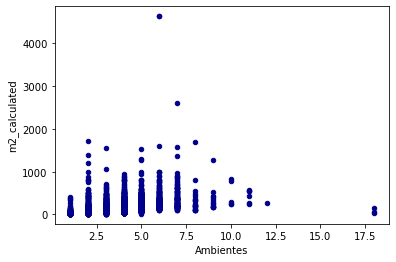

In [127]:
data.plot.scatter(x='Ambientes',y='m2_calculated', c='DarkBlue')

Conclusion: se pueden sacar outliers de propiedades de mas de 2000 m2 y propiedades de mas de 15 ambientes

In [128]:
#superficie mayor a 10.000m2
data = data[data['m2_calculated'] < 2000]
data.shape

(45342, 40)

In [129]:
#hago una mascara para graficar valores de menos de 13 ambientes
data = data[data['Ambientes'].fillna(0) <13]
data.shape

(45339, 40)

CONCLUSION, SE ELIMINAN DEL DATASET OUTLIERS DE INDICES DE MAS DE 15 AMBIENTES Y SUPERFICIES MAYORES A 2000M2

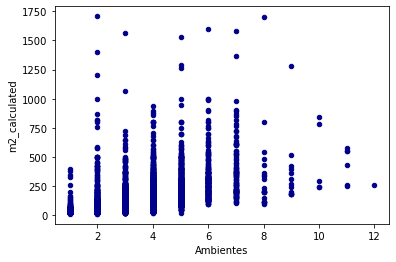

In [130]:
ax2 = data.plot.scatter(x='Ambientes', y='m2_calculated', c='DarkBlue')

In [131]:
data.drop(["metros1", "metros2", "metros3", "metros4", "M2", "Pileta", "Balcon", "Gimnasio", 
           "Quincho", "suptotnulo", "suptotnulo", "supcubnulo", "ambnulo"], axis=1, inplace = True)

In [132]:
data.Ambientes.value_counts()

2.0     6013
3.0     5915
4.0     3659
1.0     1145
5.0      850
6.0      249
7.0      106
8.0       21
9.0       13
11.0       6
10.0       5
12.0       1
Name: Ambientes, dtype: int64

## CONCLUSIÓN: se genera un nuevo dataset final, el cual se va a exportar para el próximo análisis

Primero se eliminan las columnas que no se van a utilizar, se dejan las nuevas columnas que se generaron luego del análisis del dataset original

In [133]:
data.drop(["operation", "country_name", 'place_with_parent_names',"geonames_id", 'currency',
           'price','price_aprox_local_currency','surface_total_in_m2','surface_covered_in_m2','price_usd_per_m2',
           'price_per_m2','rooms'], axis=1, inplace = True)

Luego se renombran las columnas, para generar el dataset final

In [134]:
data.rename(columns={'property_type':'Tipo_Propiedad','place_name':'Barrio','state_name':'Región','price_aprox_usd':'Precio','description':'Descripción','title':'Título','m2_calculated':'Metros_cuadrados','USDxM2':'Precio_por_m2','Estrenar':'Estado'},inplace=True)


Se hace una revisión del nuevo dataset con un "info"

In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45339 entries, 0 to 121219
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        45339 non-null  int64  
 1   Tipo_Propiedad    45339 non-null  object 
 2   Barrio            45339 non-null  object 
 3   Región            45339 non-null  object 
 4   lat-lon           28391 non-null  object 
 5   lat               28391 non-null  float64
 6   lon               28391 non-null  float64
 7   Precio            45339 non-null  float64
 8   Descripción       45338 non-null  object 
 9   Título            45339 non-null  object 
 10  Metros_cuadrados  45339 non-null  float64
 11  Precio_por_m2     45339 non-null  float64
 12  Garage            45339 non-null  int32  
 13  Estado            45339 non-null  int32  
 14  Amenities         45339 non-null  int32  
 15  Ambientes         17983 non-null  float64
dtypes: float64(6), int32(3), int64(1), obje

Finalmente exportamos el dataset para el análisis final

In [136]:
data_caba_mask = data.Región == "Capital Federal"
data_caba = data[data_caba_mask]
data_caba.Barrio.value_counts().head(20)

Belgrano             2297
Palermo              2142
Caballito            1961
Villa Urquiza        1286
Recoleta             1268
Flores               1165
Villa Crespo         1123
San Telmo            1048
Barrio Norte          937
Almagro               901
Capital Federal       818
Nuñez                 618
Balvanera             592
Saavedra              497
Monserrat             469
Palermo Hollywood     409
Floresta              403
Villa del Parque      398
Boedo                 393
Barracas              371
Name: Barrio, dtype: int64

In [137]:
location_delitos = "delitos_2019.csv"
data_delitos = pd.read_csv(location_delitos, low_memory = False)
data_delitos

,id,fecha,franja_horaria,tipo_delito,subtipo_delito,cantidad_registrada,comuna,barrio,lat,long
0,1038983,13-09-19,14,Robo (con violencia),NaN,NaN,6.0,Caballito,-34.609876,-58.456159
1,1038986,13-09-19,16,Robo (con violencia),NaN,NaN,3.0,Balvanera,-34.609394,-58.395934
2,1038989,13-09-19,13,Robo (con violencia),NaN,NaN,3.0,Balvanera,-34.609231,-58.411177
3,1038990,13-09-19,16,Robo (con violencia),NaN,NaN,3.0,Balvanera,-34.609095,-58.405899
4,1038991,13-09-19,11,Robo (con violencia),NaN,NaN,1.0,Monserrat,-34.609073,-58.380570
...,...,...,...,...,...,...,...,...,...,...
122479,1038888,13-09-19,21,Robo (con violencia),NaN,NaN,10.0,Vélez Sársfield,-34.631202,-58.500760
122480,1038920,13-09-19,20,Robo (con violencia),NaN,NaN,10.0,Vélez Sársfield,-34.624261,-58.495508
122481,1038975,13-09-19,18,Robo (con violencia),NaN,NaN,5.0,Almagro,-34.611807,-58.421817
122482,1038977,13-09-19,19,Robo (con violencia),NaN,NaN,11.0,Villa Santa Rita,-34.611037,-58.483334


In [138]:
barrios_caba = data_caba.Barrio.unique()
barrios_caba.shape

(62,)

In [139]:
barrios_delitos = data_delitos.barrio.unique()
print(barrios_delitos.shape)
print(barrios_delitos)

(49,)
['Caballito' 'Balvanera' 'Monserrat' 'Villa Gral. Mitre' 'Villa Crespo'
 'Villa Devoto' 'Almagro' 'Paternal' 'Villa del Parque' 'Recoleta'
 'Chacarita' 'Palermo' 'Retiro' 'San Nicolás' 'Villa Ortuzar' 'Colegiales'
 'Villa Urquiza' 'Belgrano' 'Nuñez' 'Saavedra' 'Villa Lugano'
 'Villa Soldati' 'Parque Avellaneda' 'Barracas' 'Mataderos'
 'Nueva Pompeya' 'Flores' 'Parque Patricios' 'Boca' 'Parque Chacabuco'
 'Liniers' 'Boedo' 'Floresta' 'Vélez Sársfield' 'Monte Castro' 'San Telmo'
 'Villa Santa Rita' 'San Cristóbal' 'Parque Chas' 'Villa Riachuelo'
 'Villa Luro' 'Villa Pueyrredón' 'Coghlan' 'Villa Real' 'Versalles'
 'Puerto Madero' nan 'Constitución' 'Agronomía']


In [140]:
todos_barrios_lista = barrios_caba.tolist() + barrios_delitos.tolist()
df_todos_barrios = pd.DataFrame(todos_barrios_lista)
df_todos_barrios.value_counts()

Parque Avellaneda    2
Mataderos            2
Villa Pueyrredón     2
Nuñez                2
Villa Ortuzar        2
                    ..
Palermo Soho         1
Palermo Viejo        1
Parque Centenario    1
Pompeya              1
Vélez Sársfield      1
Length: 66, dtype: int64

In [141]:
def no_duplicados (data_uno, data_dos):
    result = []
    for x in data_uno:
        if x not in data_dos:
            result += [x]
    return(result)

In [142]:
barrios_extra = no_duplicados(barrios_caba, barrios_delitos)
barrios_extra.sort()
print(barrios_extra)

['Abasto', 'Barrio Norte', 'Capital Federal', 'Catalinas', 'Centro / Microcentro', 'Congreso', 'Las Cañitas', 'Once', 'Palermo Chico', 'Palermo Hollywood', 'Palermo Soho', 'Palermo Viejo', 'Parque Centenario', 'Pompeya', 'San Cristobal', 'Tribunales', 'Velez Sarsfield', 'Villa General Mitre']


In [143]:

diccionario = {"Catalinas": "Retiro", "Congreso":"Balvanera", "Las Cañitas": "Palermo", "Once":"Balvanera",\
               "Palermo Chico":"Palermo","Palermo Hollywood": "Palermo", "Palermo Soho":"Palermo", "Palermo Viejo":"Palermo",\
               "Parque Centenario":"Caballito", "Pompeya":"Nueva Pompeya", "San Cristobal":"San Cristóbal",\
               "Tribunales": "San Nicolás", "Velez Sarsfield":"Vélez Sársfield", "Villa General Mitre":"Villa Gral. Mitre",\
              "Abasto": "Balvanera", "Barrio Norte":"Recoleta", "Centro / Microcentro":"San Nicolás",\
               "Constitucion":"Constitución", "San Nicolas":"San Nicolás", "Villa Pueyrredon":"Villa Pueyrredón",\
              "Nan":np.NaN}

In [144]:
data_dos = data
data_dos["new_place"] = data_dos.Barrio.map(lambda x: diccionario[x] if x in diccionario.keys() else x)

In [145]:
mask_dos = data_dos.Región == "Capital Federal"
data_caba = data_dos[mask_dos]
data_caba.new_place.value_counts(dropna= False)

Palermo              3095
Belgrano             2297
Recoleta             2205
Caballito            2022
Villa Urquiza        1286
Flores               1165
Villa Crespo         1123
Balvanera            1080
San Telmo            1048
Almagro               901
Capital Federal       818
Nuñez                 618
Saavedra              497
Monserrat             469
San Nicolás           445
Floresta              403
Villa del Parque      398
Boedo                 393
Barracas              371
Villa Devoto          352
Villa Luro            336
Colegiales            332
San Cristóbal         332
Mataderos             327
Liniers               289
Parque Patricios      270
Coghlan               228
Retiro                200
Chacarita             189
Constitución          180
Boca                  180
Villa Pueyrredón      153
Villa Lugano          149
Paternal              146
Parque Chacabuco      125
Villa Ortuzar          78
Puerto Madero          75
Monte Castro           66
Parque Avell

In [146]:
data_dos[mask_dos][["Barrio", "new_place"]].sample(5)

,Barrio,new_place
68894,Recoleta,Recoleta
47467,Palermo Hollywood,Palermo
72558,Villa Crespo,Villa Crespo
86255,Parque Patricios,Parque Patricios
72819,Flores,Flores


In [147]:
sin_barrio_mask1 = data_dos.new_place == "Capital Federal"
sin_barrio_mask2 = data_dos.lat.notnull() == True
sin_barrio_mask = sin_barrio_mask1 & sin_barrio_mask2
caba_sin_barrio = data_dos[sin_barrio_mask]
caba_sin_barrio.shape

(296, 17)

In [148]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import descartes
import pyproj
pol_barrios = gpd.read_file("barrios.csv", encoding='latin1')

In [149]:
geometria_sin_barrio = gpd.points_from_xy(caba_sin_barrio.lon, caba_sin_barrio.lat)
geo_sin_barrio = gpd.GeoDataFrame(caba_sin_barrio, geometry = geometria_sin_barrio)
geo_sin_barrio.geometry.head()

901     POINT (-58.41171 -34.61086)
1081    POINT (-58.46600 -34.54790)
2844    POINT (-58.36832 -34.60277)
2845    POINT (-58.38793 -34.59942)
5490    POINT (-58.43082 -34.59581)
Name: geometry, dtype: geometry

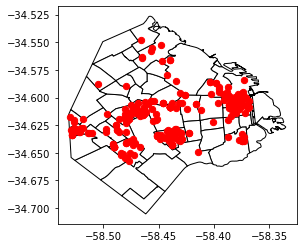

In [150]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
pol_barrios.plot(ax=ax, color='white', edgecolor='black')
geo_sin_barrio.plot(ax=ax, marker='o', color='red', markersize=40)
plt.show();

In [151]:
pol_barrios.columns

Index(['WKT', 'barrio', 'comuna', 'perimetro', 'area', 'geometry'], dtype='object')

In [152]:
geo_sin_barrio["new_place"] = geo_sin_barrio.geometry.apply(lambda x: pol_barrios[pol_barrios.contains(x)]["barrio"].iloc[0])
geo_sin_barrio.new_place.value_counts(dropna = False)

SAN NICOLAS          59
PARQUE CHACABUCO     38
CABALLITO            30
PARQUE AVELLANEDA    24
VERSALLES            21
VILLA GRAL. MITRE    16
VILLA SANTA RITA     15
MONSERRAT            11
RECOLETA             11
RETIRO               10
BARRACAS              7
VILLA CRESPO          7
ALMAGRO               6
VELEZ SARSFIELD       5
BELGRANO              5
FLORESTA              5
PALERMO               4
VILLA LURO            3
FLORES                3
VILLA REAL            3
BALVANERA             2
BOEDO                 2
CONSTITUCION          1
SAN CRISTOBAL         1
MONTE CASTRO          1
COLEGIALES            1
VILLA PUEYRREDON      1
VILLA DEVOTO          1
NUÃEZ                1
NUEVA POMPEYA         1
PARQUE CHAS           1
Name: new_place, dtype: int64

In [153]:
barrios_nuevos = pd.DataFrame(geo_sin_barrio)
type(barrios_nuevos)

pandas.core.frame.DataFrame

In [154]:
barrios_nuevos = barrios_nuevos.drop(columns = "geometry")

In [155]:
barrios_nuevos.shape

(296, 17)

In [156]:
data_dos.shape

(45339, 17)

In [157]:
data_dos = data_dos.replace({"new_place":{"Capital Federal": np.NaN}})
data_dos.new_place.isnull().sum()

818

In [158]:
frames = [barrios_nuevos, data_dos]
result = pd.concat(frames)
result.shape

(45635, 17)

In [159]:
new_frame = result.drop_duplicates(subset = ["Unnamed: 0"], keep="first")
new_frame.shape

(45339, 17)

In [161]:
new_frame = new_frame.sort_values(by = "Unnamed: 0")
new_frame.shape

(45339, 17)

In [163]:
new_frame[data_caba_mask]["new_place"].value_counts().head(20)

Palermo             3095
Belgrano            2297
Recoleta            2205
Caballito           2022
Villa Urquiza       1286
Flores              1165
Villa Crespo        1123
Balvanera           1080
San Telmo           1048
Almagro              901
Nuñez                618
Saavedra             497
Monserrat            469
San Nicolás          445
Floresta             403
Villa del Parque     398
Boedo                393
Barracas             371
Villa Devoto         352
Villa Luro           336
Name: new_place, dtype: int64

In [164]:
new_frame[data_caba_mask]["new_place"].unique().shape

(80,)

In [165]:
frame_recat = new_frame

In [166]:
frame_recat["new_place"] = frame_recat.new_place.map(lambda x: str(x))
frame_recat.new_place

In [167]:
frame_recat["new_place"] = frame_recat.new_place.map(lambda x: x.title())
frame_recat[data_caba_mask]["new_place"].unique().shape

(55,)

In [168]:
lista_recat = frame_recat[data_caba_mask]["new_place"].unique().tolist()
lista_delitos = data_delitos.barrio.unique().tolist()

In [169]:
lista_delitos

['Caballito',
 'Balvanera',
 'Monserrat',
 'Villa Gral. Mitre',
 'Villa Crespo',
 'Villa Devoto',
 'Almagro',
 'Paternal',
 'Villa del Parque',
 'Recoleta',
 'Chacarita',
 'Palermo',
 'Retiro',
 'San Nicolás',
 'Villa Ortuzar',
 'Colegiales',
 'Villa Urquiza',
 'Belgrano',
 'Nuñez',
 'Saavedra',
 'Villa Lugano',
 'Villa Soldati',
 'Parque Avellaneda',
 'Barracas',
 'Mataderos',
 'Nueva Pompeya',
 'Flores',
 'Parque Patricios',
 'Boca',
 'Parque Chacabuco',
 'Liniers',
 'Boedo',
 'Floresta',
 'Vélez Sársfield',
 'Monte Castro',
 'San Telmo',
 'Villa Santa Rita',
 'San Cristóbal',
 'Parque Chas',
 'Villa Riachuelo',
 'Villa Luro',
 'Villa Pueyrredón',
 'Coghlan',
 'Villa Real',
 'Versalles',
 'Puerto Madero',
 nan,
 'Constitución',
 'Agronomía']

In [170]:
barrios_extra_dos = no_duplicados(lista_recat, lista_delitos)
barrios_extra_dos

['Nan',
 'Villa Del Parque',
 'Nuã\x91Ez',
 'San Nicolas',
 'Velez Sarsfield',
 'San Cristobal',
 'Villa Pueyrredon',
 'Constitucion']

In [184]:
diccionario_dos = {"Catalinas": "Retiro", "Congreso":"Balvanera", "Nuã\x91Ez":"Nuñez", "Las Cañitas": "Palermo", "Once":"Balvanera",\
               "Palermo Chico":"Palermo","Palermo Hollywood": "Palermo", "Palermo Soho":"Palermo", "Palermo Viejo":"Palermo",\
               "Parque Centenario":"Caballito", "Pompeya":"Nueva Pompeya", "San Cristobal":"San Cristóbal",\
               "Tribunales": "San Nicolás", "Velez Sarsfield":"Vélez Sársfield", "Villa General Mitre":"Villa Gral. Mitre",\
              "Abasto": "Balvanera", "Barrio Norte":"Recoleta", "Centro / Microcentro":"San Nicolás",\
               "Constitucion":"Constitución", "San Nicolas":"San Nicolás", "Villa Pueyrredon":"Villa Pueyrredón",\
              "Nan":np.NaN, "nan": np.NaN, "Villa del Parque":"Villa Del Parque"}

In [185]:
frame_recat["new_place"] = frame_recat.new_place.map(lambda x: diccionario_dos[x] if x in diccionario.keys() else x)

In [186]:
frame_recat[data_caba_mask].new_place.unique().shape

(50,)

In [187]:
frame_recat[data_caba_mask].new_place.value_counts(dropna = False)

Palermo              3099
Belgrano             2302
Recoleta             2216
Caballito            2052
Villa Urquiza        1286
Flores               1168
Villa Crespo         1130
Balvanera            1082
San Telmo            1048
Almagro               907
Nuñez                 618
NaN                   522
San Nicolás           504
Saavedra              497
Monserrat             480
Floresta              408
Villa Del Parque      398
Boedo                 395
Barracas              378
Villa Devoto          353
Villa Luro            339
Colegiales            333
San Cristóbal         333
Mataderos             327
Liniers               289
Parque Patricios      270
Coghlan               228
Retiro                210
Chacarita             189
Constitución          181
Boca                  180
Parque Chacabuco      163
Villa Pueyrredón      154
Villa Lugano          149
Paternal              146
Villa Ortuzar          78
Puerto Madero          75
Parque Avellaneda      71
Monte Castro

In [189]:
frame_recat[data_caba_mask][["Barrio", "new_place"]].sample(15)

,Barrio,new_place
51882,Boedo,Boedo
38479,Capital Federal,Almagro
22953,Floresta,Floresta
63862,Parque Chacabuco,Parque Chacabuco
81306,Flores,Flores
77350,Villa Luro,Villa Luro
72946,Nuñez,Nuñez
5223,Las Cañitas,Palermo
42960,San Cristobal,San Cristóbal
90226,Constitución,Constitución


In [160]:
data.to_csv('properati-fase2.csv', sep=',', index=False)